### **Longest Common Subsequence (LCS) - Dynamic Programming**
- **Time Complexity:** O($n \times m$)
- **Space Complexity:** O($n \times m$)

where $n$ and $m$ are the lengths of the two sequences, respectively.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def LCS(s, t):
	# Dimensions (including empty string row/col)
	n_rows = len(t) + 1
	m_cols = len(s) + 1

	# Initialize DP table
	dp = np.zeros((n_rows, m_cols), dtype=int)

	# Fill DP table
	for i in range(1, n_rows):
		for j in range(1, m_cols):
			if s[j-1] == t[i-1]:
				dp[i][j] = dp[i-1][j-1] + 1
			else:
				dp[i][j] = max(dp[i-1][j], dp[i][j-1])

	return dp

In [ ]:
def LCS_table(s, t, dp):
	n_rows, m_cols = dp.shape

	# Setup the plot
	fig, ax = plt.subplots(figsize=(8, 5))
	ax.set_axis_off()

	# Create the table data
	table_data = []

	# Header row
	header = [""] + ["λ"] + list(s)
	table_data.append(header)

	# Data rows
	for i in range(n_rows):
		row_label = "λ" if i == 0 else t[i-1]
		row_data = [row_label] + list(dp[i])
		table_data.append(row_data)

	# Create the table
	table = ax.table(cellText=table_data, loc='center', cellLoc='center')
	table.scale(1, 2)
	table.auto_set_font_size(False)
	table.set_fontsize(14)

	# Highlight the LCS value in the bottom-right cell
	table[n_rows, m_cols].set_facecolor('#ffcccc')

	# Bold the headers
	for i in range(len(header)):
		table[0, i].get_text().set_weight('bold')

	for i in range(len(table_data)):
		table[i, 0].get_text().set_weight('bold')

	plt.title(f'LCS: "{s}" vs "{t}"', pad=20, fontsize=16)
	# plt.savefig("lcs_table.png", bbox_inches='tight', dpi=300)
	plt.show()

LCS length: 2


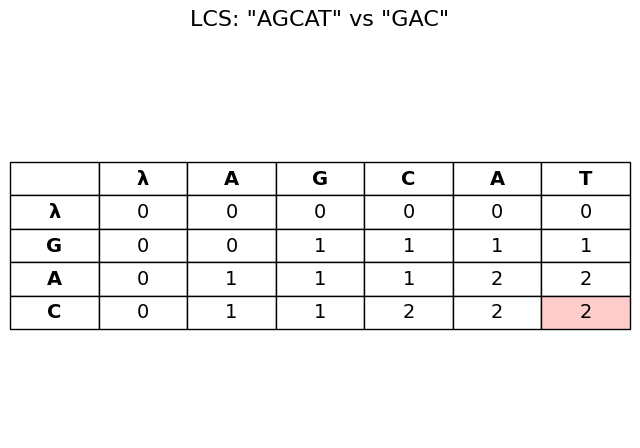

In [8]:
s = "AGCAT"
t = "GAC"
dp = LCS(s, t)

print("LCS length:", dp[-1][-1])
LCS_table(s, t, dp)